In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.datasets import make_regression
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

# 1. Data Cleaning

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
weather_data = pd.read_csv('NYC_2000s.csv')

In [4]:
weather_data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13',
       'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT22'],
      dtype='object')

In [5]:
weather_df=weather_data.drop(['TAVG','SNWD','STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION','DAPR','MDPR','WT01', 'WT02','WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13','WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT22'], axis=1)

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7881 entries, 0 to 7880
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    7881 non-null   object 
 1   PRCP    7842 non-null   float64
 2   SNOW    7504 non-null   float64
 3   TMAX    7498 non-null   float64
 4   TMIN    7498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 308.0+ KB


In [7]:
nyc=weather_df.dropna()

In [8]:
nyc

,DATE,PRCP,SNOW,TMAX,TMIN
0,2000-01-01,0.0,0.0,10.0,1.1
1,2000-01-02,0.0,0.0,15.6,6.1
2,2000-01-03,0.0,0.0,17.8,10.6
3,2000-01-04,17.8,0.0,15.6,7.8
4,2000-01-05,0.0,0.0,8.3,-1.7
...,...,...,...,...,...
7493,2020-07-07,0.0,0.0,27.8,22.2
7494,2020-07-08,0.5,0.0,28.3,23.9
7495,2020-07-09,0.0,0.0,31.7,23.9
7496,2020-07-10,64.5,0.0,25.0,22.8


In [9]:
nyc['AVG_Temp']=(nyc['TMAX']+nyc['TMIN'])/2

C:\Users\LKNT\anaconda3\envs\PythonAvd\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
nyc

,DATE,PRCP,SNOW,TMAX,TMIN,AVG_Temp
0,2000-01-01,0.0,0.0,10.0,1.1,5.55
1,2000-01-02,0.0,0.0,15.6,6.1,10.85
2,2000-01-03,0.0,0.0,17.8,10.6,14.20
3,2000-01-04,17.8,0.0,15.6,7.8,11.70
4,2000-01-05,0.0,0.0,8.3,-1.7,3.30
...,...,...,...,...,...,...
7493,2020-07-07,0.0,0.0,27.8,22.2,25.00
7494,2020-07-08,0.5,0.0,28.3,23.9,26.10
7495,2020-07-09,0.0,0.0,31.7,23.9,27.80
7496,2020-07-10,64.5,0.0,25.0,22.8,23.90


In [11]:
nyc.to_csv('nyc_data.csv', index=False)

# 2. Analysis

In [12]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('./nyc_data.csv')
data.head()

,DATE,PRCP,SNOW,TMAX,TMIN,AVG_Temp
0,2000-01-01,0.0,0.0,10.0,1.1,5.55
1,2000-01-02,0.0,0.0,15.6,6.1,10.85
2,2000-01-03,0.0,0.0,17.8,10.6,14.20
3,2000-01-04,17.8,0.0,15.6,7.8,11.70
4,2000-01-05,0.0,0.0,8.3,-1.7,3.30


In [13]:
len(data)

7497

In [14]:
data.dtypes

DATE         object
PRCP        float64
SNOW        float64
TMAX        float64
TMIN        float64
AVG_Temp    float64
dtype: object

In [15]:
max(data.DATE)

'2020-07-11'

In [16]:
min(data.DATE)

'2000-01-01'

In [17]:
data['year'] = pd.DatetimeIndex(data["DATE"]).year
data['month'] = pd.DatetimeIndex(data["DATE"]).month
data['week'] = pd.DatetimeIndex(data["DATE"]).week
data['day'] = pd.DatetimeIndex(data["DATE"]).day

In [18]:
data['Year-Week'] = pd.DatetimeIndex(data["DATE"]).strftime('%Y-%W')
data['Year-Month'] = pd.DatetimeIndex(data["DATE"]).strftime('%Y-%m')

In [19]:
data

,DATE,PRCP,SNOW,TMAX,TMIN,AVG_Temp,year,month,week,day,Year-Week,Year-Month
0,2000-01-01,0.0,0.0,10.0,1.1,5.55,2000,1,52,1,2000-00,2000-01
1,2000-01-02,0.0,0.0,15.6,6.1,10.85,2000,1,52,2,2000-00,2000-01
2,2000-01-03,0.0,0.0,17.8,10.6,14.20,2000,1,1,3,2000-01,2000-01
3,2000-01-04,17.8,0.0,15.6,7.8,11.70,2000,1,1,4,2000-01,2000-01
4,2000-01-05,0.0,0.0,8.3,-1.7,3.30,2000,1,1,5,2000-01,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7492,2020-07-07,0.0,0.0,27.8,22.2,25.00,2020,7,28,7,2020-27,2020-07
7493,2020-07-08,0.5,0.0,28.3,23.9,26.10,2020,7,28,8,2020-27,2020-07
7494,2020-07-09,0.0,0.0,31.7,23.9,27.80,2020,7,28,9,2020-27,2020-07
7495,2020-07-10,64.5,0.0,25.0,22.8,23.90,2020,7,28,10,2020-27,2020-07


In [20]:
data.dtypes

DATE           object
PRCP          float64
SNOW          float64
TMAX          float64
TMIN          float64
AVG_Temp      float64
year            int64
month           int64
week            int64
day             int64
Year-Week      object
Year-Month     object
dtype: object

In [21]:
Days_df = pd.DataFrame({
    "Date" : data['DATE'],
    "Avg_Temp" : data['AVG_Temp']
}) 

In [22]:
Days_df

,Date,Avg_Temp
0,2000-01-01,5.55
1,2000-01-02,10.85
2,2000-01-03,14.20
3,2000-01-04,11.70
4,2000-01-05,3.30
...,...,...
7492,2020-07-07,25.00
7493,2020-07-08,26.10
7494,2020-07-09,27.80
7495,2020-07-10,23.90


In [23]:
X = Days_df["Date"].values.reshape(-1, 1)
x = list(range(len(Days_df)))
y = Days_df["Avg_Temp"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (7497, 1) (7497, 1)


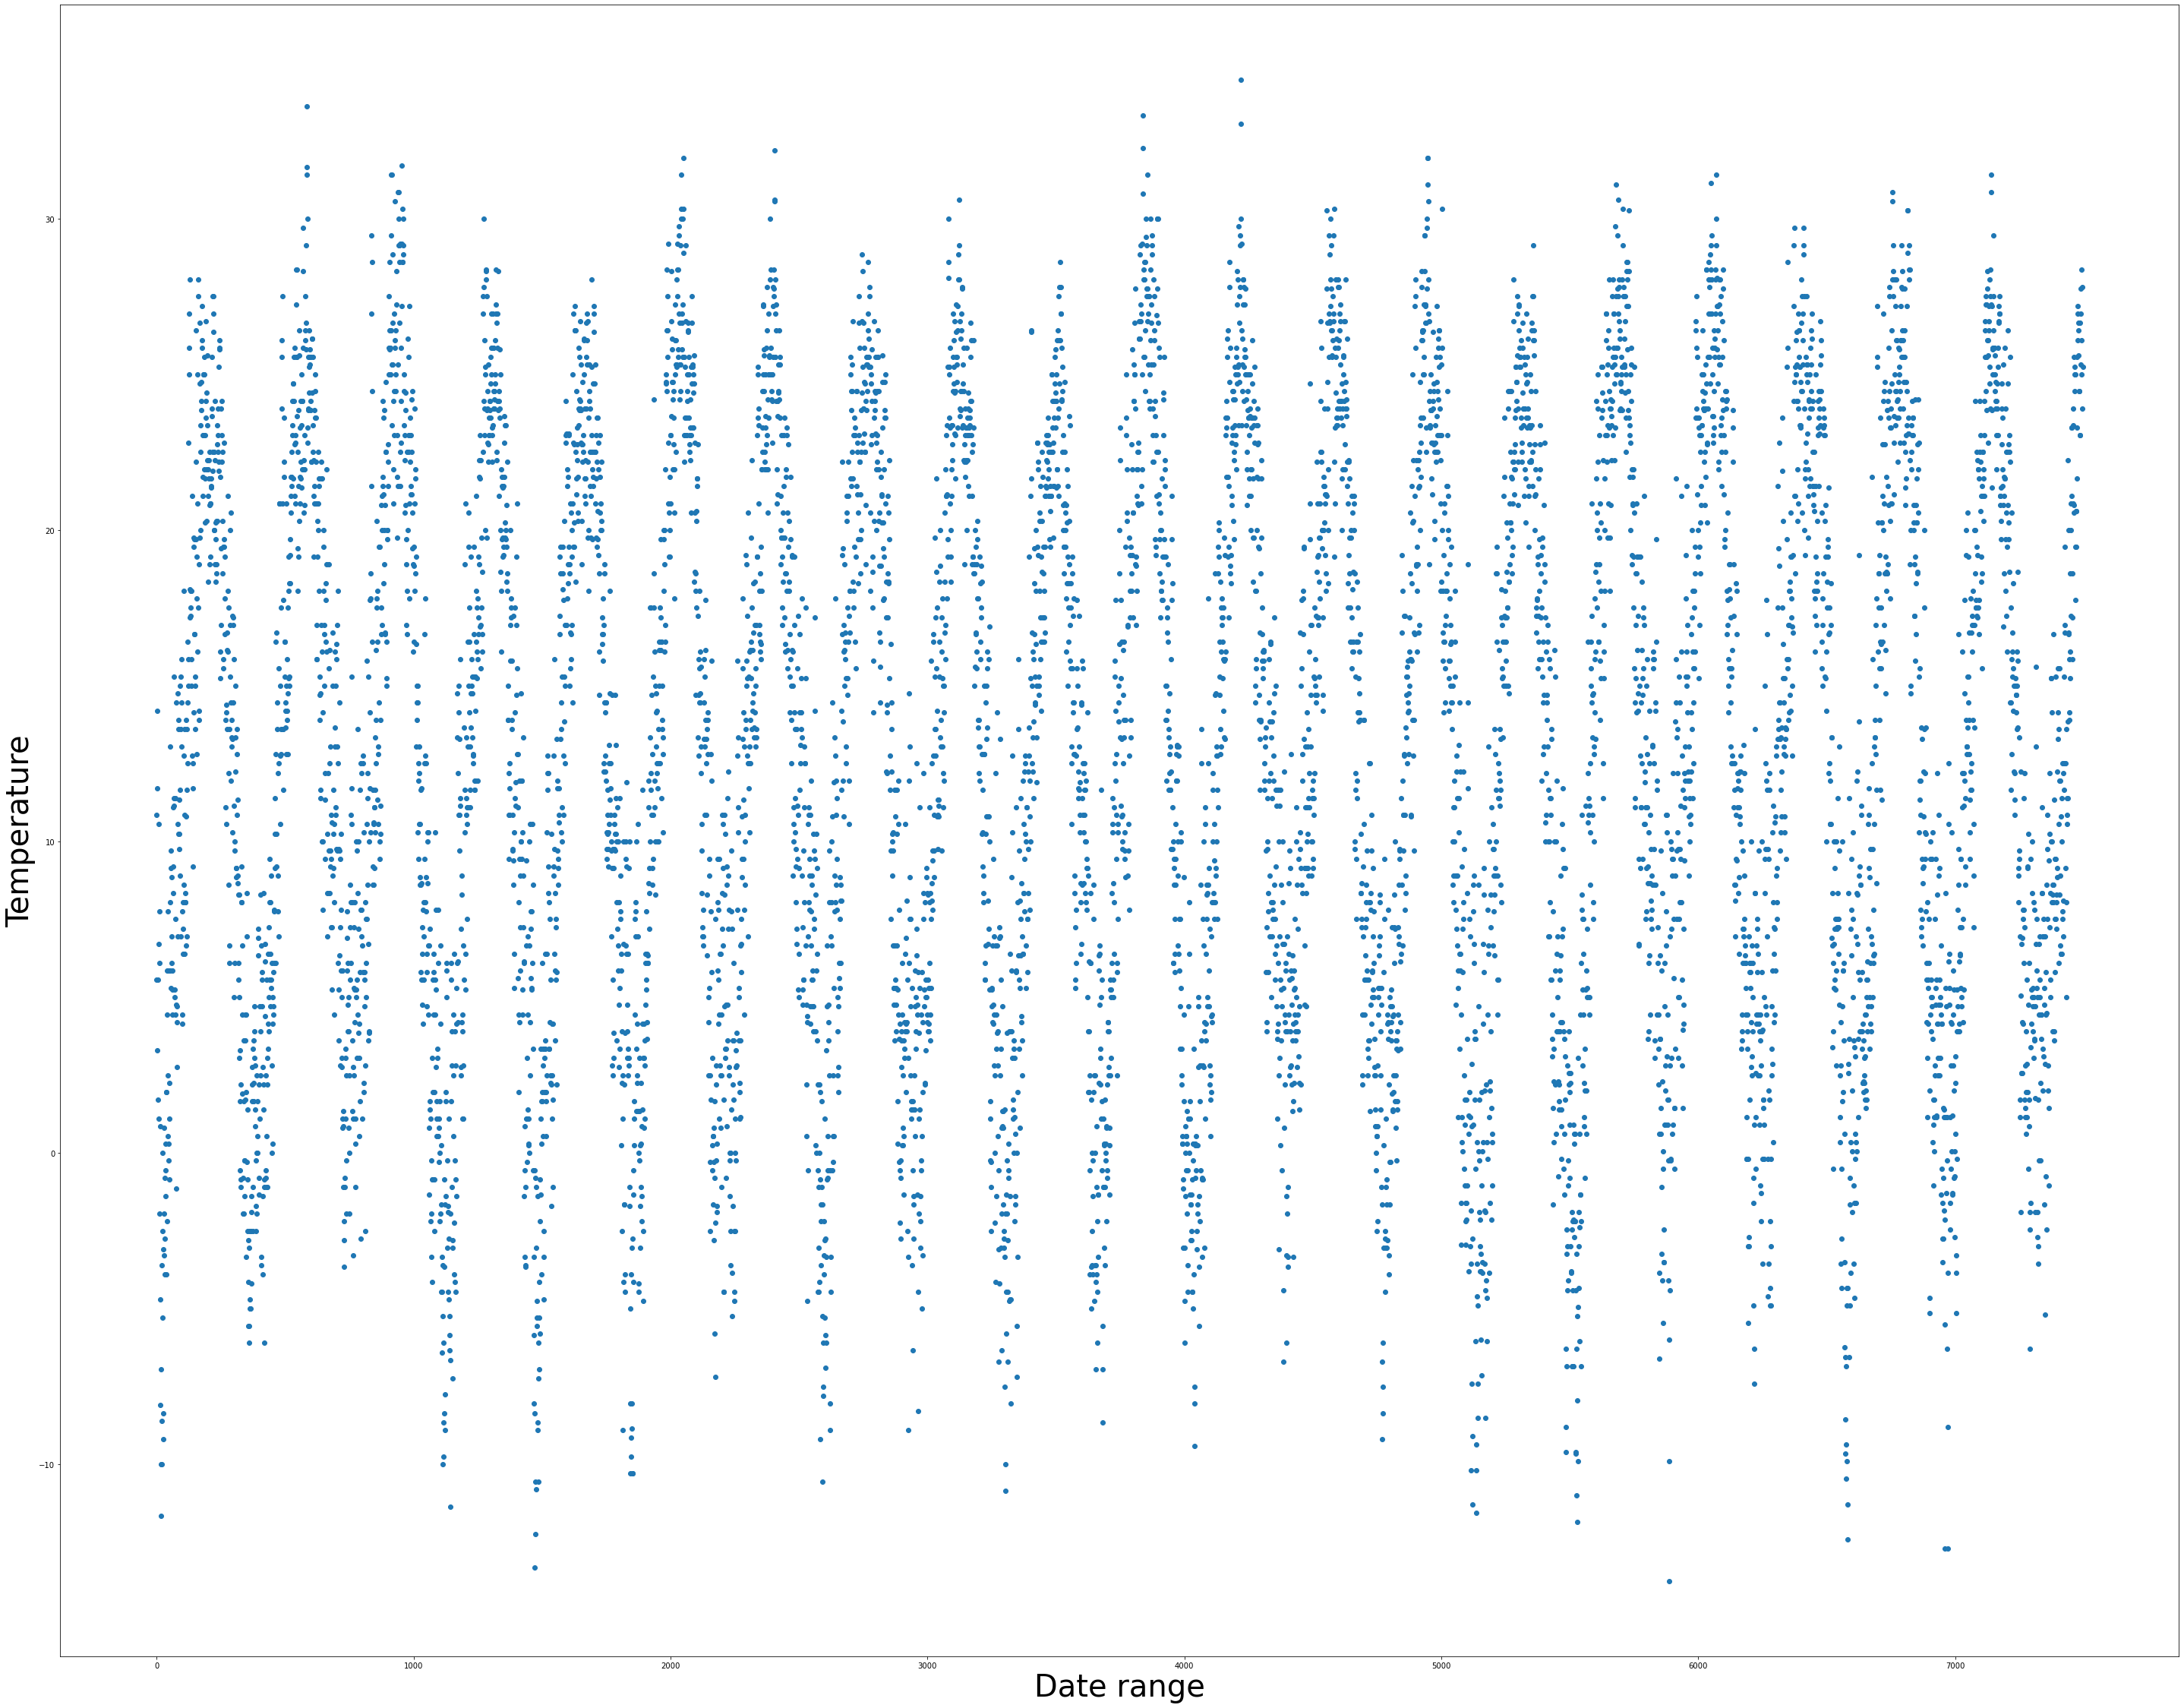

In [24]:
plt.figure(figsize = (50, 40))
plt.xlabel('Date range', fontsize=40)
plt.ylabel('Temperature', fontsize=40)
plt.scatter(x,y)

## 2.1. Training data & Test data

In [25]:
data = Days_df['Avg_Temp']

In [26]:
len(data)

7497

In [27]:
# slipt data into 2 subsets ==> Train & Test
X = data.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

In [28]:
len(train)

5997

In [29]:
len(test)

1500

## 2.2. ARIMA model

### 2.2.1 Train data

In [30]:
history_train = [x for x in train]

predictions_train = list()

actuals_train = list()

for t in range(len(train)):
    model = ARIMA(history_train, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions_train.append(yhat)
    obs = train[t]
    history_train.append(obs)
    actuals_train.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=23.570992, expected=5.550000
predicted=7.060343, expected=10.850000
predicted=17.116708, expected=14.200000
predicted=15.124549, expected=11.700000
predicted=12.822871, expected=3.300000
predicted=5.089853, expected=1.700000
predicted=3.934994, expected=5.550000
predicted=7.252617, expected=1.100000
predicted=1.703697, expected=6.700000
predicted=8.587700, expected=10.550000
predicted=8.758965, expected=7.750000
predicted=5.947250, expected=6.100000
predicted=6.167291, expected=-1.950000
predicted=-1.868695, expected=-8.100000
predicted=-4.879472, expected=-4.700000
predicted=-0.953783, expected=0.850000
predicted=1.824052, expected=-10.000000
predicted=-10.254082, expected=-11.650000
predicted=-8.567208, expected=-6.950000
predicted=-6.129396, expected=-3.600000
predicted=-4.040993, expected=-8.600000
predicted=-8.877396, expected=-10.000000
predicted=-9.270397, expected=-5.300000
predicted=-5.239860, expected=0.000000
predicted=-1.196938, expected=-2.500000
predicted=-4.200

predicted=19.476560, expected=19.150000
predicted=20.003164, expected=20.850000
predicted=21.157775, expected=20.850000
predicted=20.703951, expected=21.650000
predicted=21.534040, expected=21.400000
predicted=20.861756, expected=21.350000
predicted=21.124432, expected=25.550000
predicted=25.336972, expected=23.900000
predicted=22.485438, expected=23.650000
predicted=23.603820, expected=22.500000
predicted=22.280222, expected=21.900000
predicted=22.129861, expected=27.500000
predicted=27.902844, expected=27.500000
predicted=25.882886, expected=26.950000
predicted=26.313898, expected=26.350000
predicted=25.808547, expected=22.500000
predicted=22.313685, expected=20.000000
predicted=21.588706, expected=20.000000
predicted=21.612521, expected=18.900000
predicted=19.971098, expected=22.250000
predicted=23.305165, expected=24.150000
predicted=23.392120, expected=20.250000
predicted=19.387208, expected=18.350000
predicted=19.087950, expected=19.700000
predicted=20.258711, expected=18.900000


predicted=7.639968, expected=2.200000
predicted=0.076076, expected=-6.100000
predicted=-5.288343, expected=-0.850000
predicted=1.104689, expected=-1.100000
predicted=-1.459675, expected=6.150000
predicted=7.093254, expected=6.700000
predicted=4.361422, expected=4.400000
predicted=2.628698, expected=-0.550000
predicted=-0.736564, expected=-0.800000
predicted=0.366789, expected=2.500000
predicted=3.517073, expected=5.550000
predicted=5.351558, expected=0.550000
predicted=-0.232003, expected=-1.100000
predicted=-0.274113, expected=-1.100000
predicted=-0.588673, expected=3.050000
predicted=3.567728, expected=2.200000
predicted=1.614797, expected=3.350000
predicted=3.132632, expected=4.150000
predicted=3.228530, expected=6.400000
predicted=5.527862, expected=3.900000
predicted=3.019656, expected=5.000000
predicted=5.213101, expected=7.250000
predicted=6.748124, expected=8.050000
predicted=7.205198, expected=9.450000
predicted=8.884714, expected=5.550000
predicted=4.631218, expected=4.700000

predicted=17.878390, expected=19.150000
predicted=19.530911, expected=20.300000
predicted=20.232466, expected=20.850000
predicted=19.930612, expected=20.000000
predicted=19.212797, expected=20.850000
predicted=20.598117, expected=22.500000
predicted=22.071507, expected=21.400000
predicted=20.813872, expected=21.650000
predicted=21.729655, expected=18.050000
predicted=17.935662, expected=13.900000
predicted=15.217769, expected=15.300000
predicted=17.316982, expected=14.700000
predicted=15.410038, expected=14.750000
predicted=15.766402, expected=11.400000
predicted=11.875180, expected=11.650000
predicted=12.699792, expected=16.950000
predicted=17.255197, expected=21.650000
predicted=20.128345, expected=22.200000
predicted=20.099850, expected=21.650000
predicted=19.931436, expected=16.100000
predicted=15.100889, expected=10.000000
predicted=11.575935, expected=7.800000
predicted=10.846003, expected=10.000000
predicted=12.519191, expected=14.150000
predicted=15.151891, expected=18.050000
p

predicted=20.320740, expected=26.950000
predicted=24.671684, expected=29.450000
predicted=26.082643, expected=28.600000
predicted=26.404113, expected=24.450000
predicted=23.356703, expected=16.400000
predicted=17.256935, expected=11.650000
predicted=15.068829, expected=9.200000
predicted=12.887513, expected=8.600000
predicted=11.872852, expected=10.550000
predicted=12.673367, expected=8.600000
predicted=8.994915, expected=10.600000
predicted=11.245835, expected=11.100000
predicted=10.479793, expected=11.100000
predicted=10.701455, expected=9.150000
predicted=9.054518, expected=10.300000
predicted=10.624142, expected=13.350000
predicted=13.100933, expected=11.650000
predicted=10.795330, expected=12.500000
predicted=12.612107, expected=13.900000
predicted=13.240019, expected=16.150000
predicted=15.387116, expected=17.800000
predicted=16.822203, expected=20.300000
predicted=19.001310, expected=17.500000
predicted=16.006588, expected=11.350000
predicted=11.633071, expected=18.050000
predic

predicted=4.907005, expected=9.450000
predicted=9.869303, expected=12.500000
predicted=11.385826, expected=16.650000
predicted=15.122368, expected=17.800000
predicted=15.564331, expected=12.750000
predicted=11.012458, expected=8.050000
predicted=8.788604, expected=8.850000
predicted=10.577255, expected=12.500000
predicted=13.474624, expected=7.750000
predicted=7.815725, expected=4.700000
predicted=6.234971, expected=5.800000
predicted=6.896154, expected=6.400000
predicted=6.803238, expected=10.000000
predicted=10.471746, expected=10.300000
predicted=9.140249, expected=8.650000
predicted=7.837185, expected=4.450000
predicted=4.501275, expected=6.650000
predicted=7.817778, expected=10.300000
predicted=10.297814, expected=6.650000
predicted=6.011864, expected=0.800000
predicted=1.794532, expected=-1.350000
predicted=0.488179, expected=1.400000
predicted=3.100853, expected=7.200000
predicted=7.675062, expected=1.650000
predicted=0.398281, expected=1.100000
predicted=1.911711, expected=-2.2

predicted=19.073526, expected=19.150000
predicted=17.645693, expected=16.650000
predicted=15.987614, expected=17.200000
predicted=17.376531, expected=18.900000
predicted=18.209635, expected=21.700000
predicted=21.159638, expected=22.250000
predicted=21.196400, expected=23.050000
predicted=22.092806, expected=16.900000
predicted=16.174199, expected=21.650000
predicted=23.077267, expected=22.250000
predicted=21.376184, expected=16.950000
predicted=17.044400, expected=15.550000
predicted=17.279646, expected=17.500000
predicted=18.129738, expected=19.750000
predicted=19.939459, expected=18.650000
predicted=18.395438, expected=16.100000
predicted=16.087762, expected=16.650000
predicted=17.133774, expected=22.500000
predicted=22.412445, expected=26.950000
predicted=25.193165, expected=27.500000
predicted=25.246361, expected=30.000000
predicted=28.114835, expected=27.800000
predicted=25.663511, expected=24.150000
predicted=24.102759, expected=23.050000
predicted=24.253968, expected=26.100000


predicted=8.412310, expected=7.750000
predicted=6.736756, expected=5.300000
predicted=4.807550, expected=5.250000
predicted=5.934632, expected=6.100000
predicted=6.236784, expected=10.550000
predicted=10.466776, expected=8.600000
predicted=7.285863, expected=3.350000
predicted=3.406122, expected=-0.550000
predicted=0.935619, expected=-5.850000
predicted=-3.688041, expected=-3.350000
predicted=-0.042473, expected=-8.050000
predicted=-6.787853, expected=-13.300000
predicted=-10.700507, expected=-8.350000
predicted=-5.850248, expected=-0.550000
predicted=-1.282374, expected=-0.800000
predicted=-2.942814, expected=-10.550000
predicted=-11.502468, expected=-12.250000
predicted=-10.493220, expected=-10.800000
predicted=-9.550134, expected=-3.050000
predicted=-2.091657, expected=-1.100000
predicted=-2.787316, expected=-4.750000
predicted=-6.524193, expected=-5.300000
predicted=-5.638135, expected=-5.550000
predicted=-5.882675, expected=-1.400000
predicted=-1.039901, expected=-8.650000
predict

predicted=21.603530, expected=21.650000
predicted=22.814843, expected=22.250000
predicted=22.812816, expected=20.850000
predicted=21.267953, expected=21.650000
predicted=22.203834, expected=23.900000
predicted=23.608854, expected=25.550000
predicted=24.748252, expected=26.650000
predicted=25.720743, expected=25.300000
predicted=24.308962, expected=26.950000
predicted=26.698770, expected=26.100000
predicted=25.453525, expected=26.700000
predicted=26.806775, expected=22.200000
predicted=22.203796, expected=19.750000
predicted=21.252531, expected=18.050000
predicted=19.645898, expected=20.000000
predicted=21.498803, expected=23.600000
predicted=23.882299, expected=25.300000
predicted=24.214409, expected=24.150000
predicted=22.943225, expected=24.450000
predicted=23.827663, expected=23.900000
predicted=23.380577, expected=22.500000
predicted=22.702994, expected=21.400000
predicted=22.080357, expected=19.750000
predicted=20.463375, expected=21.100000
predicted=22.046253, expected=22.500000


predicted=-2.643343, expected=-4.450000
predicted=-1.786449, expected=0.000000
predicted=1.970588, expected=-0.250000
predicted=-0.318137, expected=3.050000
predicted=2.919814, expected=1.350000
predicted=-0.325005, expected=-3.050000
predicted=-3.209902, expected=-1.700000
predicted=-0.465320, expected=0.250000
predicted=0.304171, expected=-1.100000
predicted=-1.080073, expected=0.300000
predicted=0.646324, expected=2.250000
predicted=1.461855, expected=0.850000
predicted=0.030003, expected=-2.200000
predicted=-1.971930, expected=-1.400000
predicted=-0.613383, expected=1.400000
predicted=1.491893, expected=4.150000
predicted=3.560381, expected=11.650000
predicted=10.163323, expected=3.050000
predicted=-0.099502, expected=-4.750000
predicted=-3.336791, expected=-2.500000
predicted=-0.019218, expected=0.800000
predicted=1.640444, expected=3.050000
predicted=3.543493, expected=4.150000
predicted=3.271929, expected=1.100000
predicted=-0.234286, expected=2.800000
predicted=2.929612, expect

predicted=26.309092, expected=24.700000
predicted=23.732874, expected=26.650000
predicted=26.736606, expected=25.300000
predicted=24.290139, expected=25.250000
predicted=25.616453, expected=23.300000
predicted=23.599534, expected=24.400000
predicted=25.040284, expected=25.000000
predicted=25.045758, expected=23.300000
predicted=23.300887, expected=24.700000
predicted=25.172481, expected=25.600000
predicted=25.140711, expected=18.350000
predicted=18.325593, expected=18.650000
predicted=20.958168, expected=22.800000
predicted=23.353479, expected=20.550000
predicted=20.182827, expected=18.600000
predicted=19.527697, expected=18.050000
predicted=18.427077, expected=14.700000
predicted=15.240853, expected=17.500000
predicted=19.151134, expected=20.300000
predicted=20.018427, expected=20.600000
predicted=19.767359, expected=21.650000
predicted=20.998557, expected=21.650000
predicted=20.531265, expected=21.400000
predicted=20.919538, expected=22.750000
predicted=22.592847, expected=17.250000


predicted=13.137673, expected=19.200000
predicted=18.286129, expected=15.800000
predicted=13.420841, expected=18.900000
predicted=18.793868, expected=15.000000
predicted=13.790537, expected=12.750000
predicted=13.640749, expected=15.250000
predicted=16.418071, expected=17.250000
predicted=16.922418, expected=20.550000
predicted=20.109481, expected=12.500000
predicted=11.243386, expected=6.950000
predicted=8.843747, expected=11.700000
predicted=13.945994, expected=12.500000
predicted=12.560503, expected=15.300000
predicted=15.874530, expected=10.300000
predicted=9.285904, expected=16.100000
predicted=16.525737, expected=13.050000
predicted=11.461894, expected=12.500000
predicted=13.118949, expected=13.900000
predicted=14.165206, expected=16.150000
predicted=15.510681, expected=15.250000
predicted=14.708950, expected=16.400000
predicted=16.163560, expected=19.750000
predicted=18.880259, expected=22.250000
predicted=20.728830, expected=17.500000
predicted=16.243385, expected=13.600000
pre

predicted=7.184139, expected=6.400000
predicted=8.071504, expected=9.150000
predicted=10.121104, expected=11.650000
predicted=11.030804, expected=14.150000
predicted=12.594860, expected=16.650000
predicted=14.758063, expected=13.100000
predicted=11.335303, expected=14.150000
predicted=14.296113, expected=12.500000
predicted=12.113991, expected=13.600000
predicted=14.225680, expected=14.150000
predicted=14.228445, expected=15.250000
predicted=14.987844, expected=17.800000
predicted=17.253721, expected=13.350000
predicted=12.287818, expected=8.900000
predicted=9.973946, expected=7.250000
predicted=9.016231, expected=5.250000
predicted=6.970197, expected=4.750000
predicted=6.841684, expected=5.550000
predicted=6.714666, expected=5.550000
predicted=5.828266, expected=9.700000
predicted=9.704597, expected=8.050000
predicted=6.634564, expected=11.100000
predicted=10.821470, expected=13.050000
predicted=11.570519, expected=12.500000
predicted=11.198584, expected=12.500000
predicted=12.106800,

predicted=26.575593, expected=21.650000
predicted=20.679443, expected=18.350000
predicted=19.681274, expected=23.050000
predicted=24.508136, expected=17.500000
predicted=17.139922, expected=18.050000
predicted=20.217410, expected=23.600000
predicted=23.680759, expected=23.050000
predicted=21.454224, expected=19.450000
predicted=19.435274, expected=23.050000
predicted=23.331310, expected=23.300000
predicted=22.119579, expected=16.400000
predicted=16.635480, expected=15.550000
predicted=17.724048, expected=19.150000
predicted=19.926448, expected=21.400000
predicted=21.228804, expected=24.450000
predicted=23.881342, expected=24.450000
predicted=22.631088, expected=22.800000
predicted=21.694530, expected=22.500000
predicted=22.382634, expected=21.150000
predicted=21.235085, expected=19.700000
predicted=20.507336, expected=18.300000
predicted=19.267055, expected=20.550000
predicted=21.393194, expected=23.050000
predicted=22.763938, expected=27.500000
predicted=26.511259, expected=26.650000


predicted=2.405940, expected=4.150000
predicted=4.955189, expected=6.900000
predicted=7.151386, expected=8.100000
predicted=7.342546, expected=3.900000
predicted=3.118013, expected=4.200000
predicted=4.788312, expected=5.550000
predicted=5.570383, expected=-2.500000
predicted=-2.207675, expected=-8.900000
predicted=-5.758134, expected=-3.350000
predicted=-0.411732, expected=3.050000
predicted=2.942606, expected=6.100000
predicted=4.769068, expected=11.950000
predicted=9.598633, expected=14.750000
predicted=10.693086, expected=13.050000
predicted=10.166407, expected=7.500000
predicted=6.671820, expected=8.850000
predicted=9.899249, expected=7.500000
predicted=7.884199, expected=4.700000
predicted=6.044357, expected=2.500000
predicted=4.114955, expected=1.650000
predicted=2.896078, expected=1.100000
predicted=2.287083, expected=1.400000
predicted=2.317844, expected=5.300000
predicted=5.497776, expected=1.400000
predicted=0.352124, expected=-3.600000
predicted=-2.681543, expected=-6.35000

predicted=27.011041, expected=23.650000
predicted=24.419156, expected=23.900000
predicted=25.437493, expected=24.450000
predicted=25.129273, expected=26.150000
predicted=26.448416, expected=23.850000
predicted=23.581107, expected=24.450000
predicted=24.832528, expected=26.950000
predicted=26.701749, expected=26.400000
predicted=25.645827, expected=27.800000
predicted=27.707387, expected=27.750000
predicted=26.945714, expected=23.300000
predicted=23.094846, expected=23.350000
predicted=24.707016, expected=24.700000
predicted=25.173857, expected=25.300000
predicted=25.468313, expected=25.850000
predicted=25.891866, expected=24.450000
predicted=24.032087, expected=22.250000
predicted=22.494593, expected=22.200000
predicted=23.013900, expected=22.750000
predicted=23.229647, expected=18.900000
predicted=19.347442, expected=21.700000
predicted=23.039325, expected=23.050000
predicted=22.577397, expected=23.900000
predicted=23.484478, expected=22.250000
predicted=21.833647, expected=22.200000


predicted=2.982728, expected=1.100000
predicted=2.590211, expected=0.000000
predicted=1.199892, expected=3.350000
predicted=3.811079, expected=3.600000
predicted=2.681998, expected=-2.200000
predicted=-2.345971, expected=1.150000
predicted=2.564626, expected=3.050000
predicted=2.335653, expected=-1.650000
predicted=-1.795866, expected=-1.400000
predicted=0.008738, expected=0.600000
predicted=0.518291, expected=5.850000
predicted=5.418423, expected=11.100000
predicted=9.276645, expected=5.800000
predicted=3.114599, expected=0.000000
predicted=0.238993, expected=-5.550000
predicted=-3.893056, expected=-7.200000
predicted=-4.155175, expected=-3.350000
predicted=-0.688131, expected=1.950000
predicted=2.123173, expected=8.050000
predicted=6.269200, expected=15.850000
predicted=12.302925, expected=13.600000
predicted=8.938364, expected=6.350000
predicted=4.731320, expected=5.550000
predicted=6.571933, expected=9.700000
predicted=10.422983, expected=3.350000
predicted=3.613412, expected=0.800

predicted=17.095424, expected=18.300000
predicted=19.070385, expected=21.950000
predicted=21.680979, expected=20.250000
predicted=19.326116, expected=21.400000
predicted=21.232638, expected=19.150000
predicted=18.340729, expected=15.000000
predicted=15.602125, expected=18.300000
predicted=19.929802, expected=16.400000
predicted=16.206343, expected=17.500000
predicted=18.446121, expected=18.900000
predicted=18.730207, expected=20.300000
predicted=19.528853, expected=23.650000
predicted=22.877930, expected=23.350000
predicted=21.697740, expected=16.950000
predicted=16.436695, expected=15.800000
predicted=17.406285, expected=17.500000
predicted=18.483956, expected=18.300000
predicted=18.847010, expected=15.550000
predicted=15.991141, expected=12.500000
predicted=13.300296, expected=10.550000
predicted=11.775173, expected=13.050000
predicted=14.393899, expected=19.150000
predicted=19.112516, expected=18.600000
predicted=16.799500, expected=15.550000
predicted=14.765553, expected=14.450000


predicted=13.086006, expected=11.150000
predicted=13.754310, expected=17.750000
predicted=19.406599, expected=15.250000
predicted=14.877776, expected=10.800000
predicted=12.084688, expected=13.300000
predicted=14.360594, expected=16.400000
predicted=15.774205, expected=10.850000
predicted=10.554204, expected=10.000000
predicted=11.548152, expected=9.750000
predicted=10.170263, expected=12.500000
predicted=13.086319, expected=14.700000
predicted=14.454665, expected=16.150000
predicted=15.063484, expected=16.400000
predicted=15.192307, expected=13.350000
predicted=12.540127, expected=13.900000
predicted=14.420192, expected=9.450000
predicted=9.705547, expected=10.300000
predicted=12.102894, expected=9.700000
predicted=10.367991, expected=8.850000
predicted=9.545189, expected=13.900000
predicted=14.446283, expected=19.450000
predicted=17.667253, expected=23.600000
predicted=20.997666, expected=25.000000
predicted=22.062885, expected=23.050000
predicted=20.663451, expected=21.950000
predic

predicted=7.716022, expected=6.100000
predicted=8.340332, expected=8.600000
predicted=9.204758, expected=9.450000
predicted=9.127464, expected=9.150000
predicted=8.920698, expected=7.500000
predicted=7.165500, expected=6.400000
predicted=6.643315, expected=5.800000
predicted=6.389780, expected=8.600000
predicted=9.140311, expected=10.550000
predicted=9.971994, expected=9.450000
predicted=8.622380, expected=11.950000
predicted=11.591074, expected=12.800000
predicted=11.511557, expected=11.950000
predicted=11.272948, expected=11.950000
predicted=11.859723, expected=13.050000
predicted=12.745882, expected=13.100000
predicted=12.764083, expected=10.000000
predicted=10.020774, expected=6.650000
predicted=7.638524, expected=8.900000
predicted=10.281535, expected=6.400000
predicted=6.686904, expected=12.750000
predicted=13.846206, expected=13.050000
predicted=11.321299, expected=7.500000
predicted=6.771275, expected=5.850000
predicted=7.059472, expected=7.500000
predicted=8.100225, expected=3

predicted=25.507638, expected=26.150000
predicted=25.259487, expected=26.400000
predicted=25.886565, expected=21.700000
predicted=21.476099, expected=19.150000
predicted=20.487427, expected=19.450000
predicted=20.905360, expected=17.200000
predicted=18.234900, expected=21.400000
predicted=22.843820, expected=24.750000
predicted=23.790867, expected=28.600000
predicted=27.000648, expected=27.800000
predicted=25.660747, expected=25.850000
predicted=24.660349, expected=18.600000
predicted=18.711663, expected=18.850000
predicted=21.268666, expected=19.200000
predicted=20.578031, expected=18.300000
predicted=19.463196, expected=20.800000
predicted=21.714871, expected=22.800000
predicted=21.946669, expected=21.100000
predicted=20.210871, expected=23.050000
predicted=22.977767, expected=24.450000
predicted=23.434669, expected=23.300000
predicted=22.613157, expected=24.450000
predicted=24.482710, expected=24.200000
predicted=23.579955, expected=20.300000
predicted=20.373780, expected=19.700000


predicted=3.705435, expected=0.250000
predicted=1.356054, expected=3.600000
predicted=5.654867, expected=5.250000
predicted=5.729740, expected=8.600000
predicted=8.872138, expected=4.700000
predicted=3.547518, expected=-0.550000
predicted=-0.178462, expected=6.700000
predicted=8.117087, expected=10.000000
predicted=8.462873, expected=8.050000
predicted=7.109889, expected=5.300000
predicted=5.044267, expected=-4.400000
predicted=-4.110381, expected=-6.700000
predicted=-3.007596, expected=0.800000
predicted=3.413691, expected=6.700000
predicted=6.070127, expected=12.250000
predicted=10.320929, expected=4.200000
predicted=0.836813, expected=2.200000
predicted=2.422143, expected=4.450000
predicted=4.807237, expected=5.850000
predicted=5.954213, expected=6.100000
predicted=6.447253, expected=3.900000
predicted=3.558626, expected=-1.400000
predicted=-0.962654, expected=-6.100000
predicted=-4.001828, expected=-3.300000
predicted=-0.701443, expected=6.950000
predicted=7.401530, expected=3.9000

predicted=21.717801, expected=19.150000
predicted=21.477348, expected=20.850000
predicted=22.689630, expected=23.300000
predicted=24.233576, expected=25.850000
predicted=25.985083, expected=28.050000
predicted=26.799058, expected=24.400000
predicted=22.843105, expected=25.550000
predicted=25.765344, expected=26.150000
predicted=25.706918, expected=23.600000
predicted=23.625591, expected=23.350000
predicted=24.350061, expected=23.600000
predicted=23.861913, expected=23.900000
predicted=24.164384, expected=23.350000
predicted=23.540840, expected=25.850000
predicted=25.892187, expected=27.800000
predicted=26.898736, expected=28.050000
predicted=27.045430, expected=27.800000
predicted=27.108899, expected=26.100000
predicted=25.651773, expected=24.150000
predicted=24.593298, expected=26.400000
predicted=27.258560, expected=26.950000
predicted=26.754233, expected=23.900000
predicted=23.950206, expected=27.250000
predicted=27.952453, expected=26.700000
predicted=25.737343, expected=25.300000


predicted=2.696519, expected=4.200000
predicted=3.337430, expected=7.800000
predicted=6.834165, expected=2.200000
predicted=1.174429, expected=-3.900000
predicted=-2.345672, expected=-3.300000
predicted=-0.984413, expected=5.000000
predicted=5.910594, expected=-0.300000
predicted=-1.523583, expected=-1.650000
predicted=-0.529244, expected=-0.300000
predicted=-0.372402, expected=3.900000
predicted=3.410939, expected=4.700000
predicted=3.800797, expected=3.600000
predicted=2.658038, expected=4.200000
predicted=3.659729, expected=5.250000
predicted=4.614766, expected=7.250000
predicted=6.810486, expected=4.700000
predicted=3.973600, expected=1.900000
predicted=2.332288, expected=1.350000
predicted=2.304246, expected=1.400000
predicted=2.184480, expected=4.400000
predicted=5.051474, expected=4.450000
predicted=3.800233, expected=1.950000
predicted=1.605025, expected=2.500000
predicted=2.869556, expected=7.250000
predicted=6.960681, expected=6.100000
predicted=4.807565, expected=8.300000
pr

predicted=18.046597, expected=25.300000
predicted=26.342040, expected=30.300000
predicted=27.876712, expected=25.850000
predicted=23.707276, expected=20.000000
predicted=20.408344, expected=15.800000
predicted=17.127922, expected=16.700000
predicted=19.126392, expected=18.050000
predicted=19.695929, expected=14.150000
predicted=14.936148, expected=16.400000
predicted=17.750067, expected=19.200000
predicted=18.648450, expected=20.850000
predicted=19.936582, expected=20.550000
predicted=19.653069, expected=16.400000
predicted=15.734532, expected=14.450000
predicted=15.425674, expected=15.550000
predicted=16.683152, expected=16.950000
predicted=17.481531, expected=18.050000
predicted=18.102517, expected=17.250000
predicted=16.734400, expected=18.050000
predicted=17.800010, expected=18.050000
predicted=17.591475, expected=18.600000
predicted=18.461438, expected=21.400000
predicted=21.086333, expected=23.050000
predicted=21.878107, expected=21.400000
predicted=20.386210, expected=24.450000


predicted=8.880774, expected=12.800000
predicted=13.121097, expected=11.650000
predicted=10.062349, expected=10.000000
predicted=9.791645, expected=18.600000
predicted=18.515200, expected=16.400000
predicted=13.546124, expected=18.600000
predicted=18.326506, expected=19.450000
predicted=17.918994, expected=8.900000
predicted=8.024657, expected=4.450000
predicted=7.968006, expected=5.550000
predicted=8.284631, expected=5.550000
predicted=7.329440, expected=12.500000
predicted=13.899661, expected=11.400000
predicted=9.380157, expected=12.200000
predicted=11.367584, expected=16.150000
predicted=14.886732, expected=11.400000
predicted=9.509097, expected=11.150000
predicted=12.170722, expected=11.950000
predicted=12.061942, expected=13.600000
predicted=13.599715, expected=11.650000
predicted=11.573540, expected=13.300000
predicted=13.566703, expected=8.600000
predicted=8.158829, expected=8.050000
predicted=9.529417, expected=18.100000
predicted=18.642199, expected=17.200000
predicted=14.415

predicted=11.631510, expected=10.000000
predicted=11.327566, expected=6.950000
predicted=8.008463, expected=6.950000
predicted=9.011742, expected=10.000000
predicted=11.120319, expected=15.850000
predicted=15.251499, expected=15.550000
predicted=13.420933, expected=11.400000
predicted=10.283945, expected=8.050000
predicted=8.422228, expected=5.550000
predicted=6.833073, expected=10.850000
predicted=12.700327, expected=11.400000
predicted=10.900450, expected=13.600000
predicted=13.257604, expected=13.300000
predicted=11.948021, expected=5.550000
predicted=4.919733, expected=3.650000
predicted=6.016179, expected=3.100000
predicted=4.768545, expected=4.450000
predicted=6.080569, expected=7.750000
predicted=8.377497, expected=1.450000
predicted=0.604346, expected=-1.650000
predicted=-0.050526, expected=3.350000
predicted=4.574862, expected=0.350000
predicted=-0.189067, expected=2.300000
predicted=3.626324, expected=10.000000
predicted=9.118518, expected=16.150000
predicted=12.942284, expec

predicted=23.958008, expected=23.850000
predicted=23.291130, expected=24.400000
predicted=24.687472, expected=22.250000
predicted=22.349990, expected=12.500000
predicted=13.702713, expected=11.400000
predicted=15.179642, expected=16.100000
predicted=18.062229, expected=15.250000
predicted=15.538840, expected=16.950000
predicted=17.687058, expected=20.000000
predicted=18.848131, expected=18.050000
predicted=16.437177, expected=21.650000
predicted=21.571380, expected=24.150000
predicted=22.480794, expected=23.050000
predicted=21.656502, expected=26.950000
predicted=26.483747, expected=26.950000
predicted=25.015852, expected=26.100000
predicted=25.443411, expected=25.000000
predicted=24.858511, expected=23.050000
predicted=23.207551, expected=22.200000
predicted=23.195213, expected=23.350000
predicted=24.156698, expected=19.750000
predicted=20.020788, expected=25.300000
predicted=26.512409, expected=20.850000
predicted=19.561810, expected=26.400000
predicted=27.316772, expected=25.850000


predicted=9.376827, expected=14.200000
predicted=13.472171, expected=14.450000
predicted=12.276482, expected=19.700000
predicted=17.765306, expected=16.400000
predicted=13.290610, expected=11.650000
predicted=11.504463, expected=11.950000
predicted=13.243746, expected=4.450000
predicted=5.264118, expected=4.450000
predicted=8.049784, expected=6.100000
predicted=7.646898, expected=7.250000
predicted=7.754528, expected=3.350000
predicted=3.649378, expected=2.200000
predicted=3.147843, expected=4.450000
predicted=5.004199, expected=-3.850000
predicted=-3.690700, expected=-6.600000
predicted=-3.414124, expected=0.600000
predicted=2.329800, expected=3.650000
predicted=2.513584, expected=3.650000
predicted=2.829109, expected=6.350000
predicted=4.998024, expected=9.700000
predicted=7.419915, expected=0.600000
predicted=-0.973918, expected=1.450000
predicted=3.618311, expected=-3.250000
predicted=-2.801980, expected=-1.100000
predicted=1.320509, expected=5.850000
predicted=6.441924, expected=8

In [31]:
MSE = mean_squared_error(actuals_train, predictions_train)
RMSE = math.sqrt(MSE)


forecast_errors = [actuals_train[i] - predictions_train[i] for i in range(len(actuals_train))]
forecast_errors_abs = [ abs( actuals_train[i] - predictions_train[i] ) for i in range(len(actuals_train))]

BIAS = sum(forecast_errors) * 1.0/len(actuals_train)
MAE = sum(forecast_errors_abs) * 1.0/len(actuals_train)


from sklearn.metrics import r2_score
r2_score = r2_score(actuals_train, predictions_train)


In [32]:
print('Train MSE                         : %f' % MSE)
print('Train RMSE                        : %f' % RMSE)
print('Train Bias (Mean Forecast Error)  : %f' % BIAS)
print('Train MAE (Mean Absolute Error)   : %f' % MAE)
print('Train r2_score                    : %f' % r2_score )


Train MSE                         : 9.121227
Train RMSE                        : 3.020137
Train Bias (Mean Forecast Error)  : -0.001139
Train MAE (Mean Absolute Error)   : 2.335813
Train r2_score                    : 0.899760


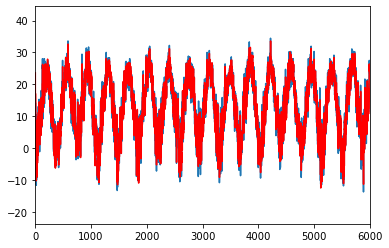

In [33]:
# plot
plt.plot(actuals_train)
plt.plot(predictions_train, color='red')
plt.xlim(0, len(actuals_train) + 10)
plt.ylim(min(min(actuals_train), min(predictions_train)) - 10, 
         max(max(actuals_train), max(predictions_train)) + 10
        )
plt.plot()
plt.show()

In [34]:
len(actuals_train)

5997

In [35]:
len(predictions_train)

5997

### 2.2.2 Test data

In [36]:
history_test = [x for x in test]

predictions_test = []

actuals_test = []

for t in range(len(test)):
    model = ARIMA(history_test, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()    
    yhat = output[0][0]
    predictions_test.append(yhat)
    obs = test[t]
    history_test.append(obs)
    actuals_test.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=26.586967, expected=21.150000
predicted=21.287363, expected=19.150000
predicted=20.896812, expected=23.600000
predicted=25.170482, expected=20.000000
predicted=19.349461, expected=23.300000
predicted=24.374004, expected=23.600000
predicted=22.646785, expected=15.250000
predicted=15.027281, expected=16.950000
predicted=19.896694, expected=19.450000
predicted=19.788160, expected=23.050000
predicted=22.716478, expected=22.500000
predicted=21.457745, expected=18.600000
predicted=17.801943, expected=20.250000
predicted=20.897383, expected=23.050000
predicted=22.637861, expected=20.800000
predicted=20.203417, expected=21.400000
predicted=21.901911, expected=23.350000
predicted=22.818272, expected=25.000000
predicted=24.029269, expected=23.350000
predicted=22.644579, expected=26.400000
predicted=26.154422, expected=25.000000
predicted=23.784805, expected=24.450000
predicted=24.476002, expected=24.150000
predicted=24.407479, expected=23.900000
predicted=23.975091, expected=25.000000


predicted=4.756668, expected=10.000000
predicted=9.936803, expected=2.750000
predicted=1.612111, expected=4.200000
predicted=5.936497, expected=2.500000
predicted=2.917824, expected=3.100000
predicted=3.829221, expected=6.650000
predicted=7.108323, expected=3.900000
predicted=2.725194, expected=5.000000
predicted=5.343768, expected=6.100000
predicted=5.566153, expected=-0.800000
predicted=-0.948768, expected=-1.600000
predicted=0.934555, expected=-4.900000
predicted=-3.353245, expected=-6.300000
predicted=-4.030622, expected=-7.400000
predicted=-5.340988, expected=0.900000
predicted=1.489624, expected=8.350000
predicted=5.538864, expected=13.600000
predicted=9.256294, expected=8.350000
predicted=4.329584, expected=-0.500000
predicted=-1.030411, expected=1.150000
predicted=3.688098, expected=2.550000
predicted=3.660449, expected=4.450000
predicted=5.317790, expected=4.150000
predicted=3.969588, expected=6.650000
predicted=5.821413, expected=5.800000
predicted=4.553582, expected=7.200000

predicted=21.870696, expected=19.200000
predicted=21.671970, expected=21.650000
predicted=23.229770, expected=21.950000
predicted=22.159435, expected=25.550000
predicted=25.325396, expected=22.200000
predicted=20.772026, expected=22.800000
predicted=22.949276, expected=25.000000
predicted=24.775173, expected=27.500000
predicted=26.475159, expected=25.300000
predicted=24.396468, expected=25.300000
predicted=25.239063, expected=24.750000
predicted=24.612530, expected=23.100000
predicted=23.409829, expected=21.100000
predicted=22.191142, expected=19.750000
predicted=20.960202, expected=21.950000
predicted=23.003250, expected=23.600000
predicted=23.439041, expected=24.150000
predicted=23.506555, expected=24.200000
predicted=23.527531, expected=21.400000
predicted=20.947113, expected=25.000000
predicted=25.533360, expected=23.900000
predicted=23.132310, expected=21.650000
predicted=21.858730, expected=25.850000
predicted=26.471987, expected=24.450000
predicted=23.171067, expected=25.300000


predicted=1.982079, expected=3.650000
predicted=5.418705, expected=5.800000
predicted=5.939989, expected=13.850000
predicted=13.593417, expected=19.200000
predicted=16.034791, expected=8.900000
predicted=5.341179, expected=3.900000
predicted=5.675976, expected=9.200000
predicted=11.085773, expected=5.550000
predicted=5.427694, expected=8.600000
predicted=10.675835, expected=8.600000
predicted=7.924722, expected=10.850000
predicted=10.091956, expected=11.150000
predicted=10.268948, expected=3.900000
predicted=3.387886, expected=5.800000
predicted=8.045970, expected=3.900000
predicted=4.295019, expected=3.350000
predicted=4.693325, expected=4.150000
predicted=5.166707, expected=2.250000
predicted=2.185368, expected=2.250000
predicted=3.077938, expected=2.300000
predicted=2.571256, expected=1.950000
predicted=2.107316, expected=3.600000
predicted=3.827399, expected=3.050000
predicted=2.501214, expected=2.500000
predicted=2.462318, expected=2.250000
predicted=2.360092, expected=4.450000
pr

predicted=20.855954, expected=21.950000
predicted=20.936590, expected=23.050000
predicted=22.281311, expected=24.150000
predicted=23.526283, expected=23.050000
predicted=22.692688, expected=23.600000
predicted=23.680735, expected=23.600000
predicted=23.306154, expected=20.250000
predicted=20.393328, expected=20.800000
predicted=22.048185, expected=20.000000
predicted=20.371654, expected=17.250000
predicted=18.106348, expected=17.250000
predicted=18.697361, expected=18.900000
predicted=19.338058, expected=24.200000
predicted=23.769965, expected=19.150000
predicted=17.510033, expected=15.800000
predicted=16.691398, expected=18.300000
predicted=19.310145, expected=16.650000
predicted=16.563620, expected=20.800000
predicted=21.775050, expected=21.650000
predicted=20.350421, expected=20.250000
predicted=19.257972, expected=20.250000
predicted=20.182560, expected=18.650000
predicted=18.405818, expected=18.600000
predicted=19.307908, expected=22.750000
predicted=22.950552, expected=20.550000


predicted=18.829804, expected=19.200000
predicted=16.136020, expected=13.050000
predicted=12.130239, expected=12.800000
predicted=13.771469, expected=13.050000
predicted=13.665506, expected=13.650000
predicted=14.547451, expected=20.550000
predicted=20.626272, expected=15.300000
predicted=12.888972, expected=15.300000
predicted=15.880950, expected=14.450000
predicted=14.384257, expected=19.150000
predicted=19.154027, expected=16.700000
predicted=15.847153, expected=13.900000
predicted=14.232991, expected=12.800000
predicted=13.783247, expected=11.350000
predicted=12.176667, expected=9.450000
predicted=10.991840, expected=10.300000
predicted=11.704947, expected=12.250000
predicted=12.497361, expected=11.650000
predicted=11.232286, expected=17.800000
predicted=17.387957, expected=11.650000
predicted=9.445607, expected=16.700000
predicted=17.383620, expected=12.500000
predicted=11.226570, expected=16.950000
predicted=17.410676, expected=16.100000
predicted=15.305540, expected=17.250000
pr

predicted=14.181466, expected=9.700000
predicted=8.878905, expected=9.450000
predicted=9.859125, expected=1.700000
predicted=2.418402, expected=1.150000
predicted=4.116492, expected=6.950000
predicted=8.701115, expected=12.250000
predicted=10.974055, expected=5.050000
predicted=3.442701, expected=-1.900000
predicted=-0.556123, expected=2.550000
predicted=4.787122, expected=6.700000
predicted=6.514012, expected=2.550000
predicted=2.238570, expected=2.550000
predicted=3.449670, expected=4.200000
predicted=3.775390, expected=6.900000
predicted=6.185059, expected=7.800000
predicted=6.878653, expected=7.500000
predicted=6.413877, expected=4.150000
predicted=3.738259, expected=6.100000
predicted=6.815999, expected=7.800000
predicted=7.537431, expected=11.400000
predicted=10.627486, expected=12.200000
predicted=10.575004, expected=7.250000
predicted=6.120955, expected=1.700000
predicted=3.059918, expected=2.800000
predicted=5.222817, expected=1.450000
predicted=2.821600, expected=1.150000
pre

predicted=24.367890, expected=20.800000
predicted=19.662863, expected=20.550000
predicted=21.629911, expected=24.450000
predicted=24.980610, expected=25.250000
predicted=24.169873, expected=25.000000
predicted=24.583107, expected=25.000000
predicted=24.419673, expected=19.450000
predicted=19.250666, expected=17.750000
predicted=19.894801, expected=19.450000
predicted=21.097865, expected=20.600000
predicted=21.002752, expected=20.600000
predicted=20.767615, expected=21.650000
predicted=21.330058, expected=23.300000
predicted=22.422178, expected=25.550000
predicted=24.437226, expected=26.100000
predicted=24.746342, expected=27.200000
predicted=26.124137, expected=26.950000
predicted=25.921540, expected=26.650000
predicted=26.194638, expected=26.400000
predicted=26.356405, expected=25.600000
predicted=25.703844, expected=24.450000
predicted=24.948768, expected=26.650000
predicted=27.178028, expected=24.450000
predicted=24.126020, expected=23.050000
predicted=23.806796, expected=23.050000


In [37]:
MSE = mean_squared_error(actuals_test, predictions_test)
RMSE = math.sqrt(MSE)

forecast_errors = [actuals_test[i] - predictions_test[i] for i in range(len(actuals_test))]
forecast_errors_abs = [ abs( actuals_test[i] - predictions_test[i] ) for i in range(len(actuals_test))]
BIAS = sum(forecast_errors) * 1.0/len(actuals_test)

MAE = sum(forecast_errors_abs) * 1.0/len(actuals_test)

from sklearn.metrics import r2_score
r2_score = r2_score(actuals_test, predictions_test)

In [38]:
print('Test MSE                            : %f' % MSE)
print('Test RMSE                           : %f' % RMSE)
print('Test Bias (Mean Forecast Error)     : %f' % BIAS)
print('Test MAE  (Mean Absolute Error)     : %f' % MAE)
print('Test r2_score                       : %f' % r2_score)

Test MSE                            : 9.701058
Test RMSE                           : 3.114652
Test Bias (Mean Forecast Error)     : 0.006714
Test MAE  (Mean Absolute Error)     : 2.440066
Test r2_score                       : 0.891401


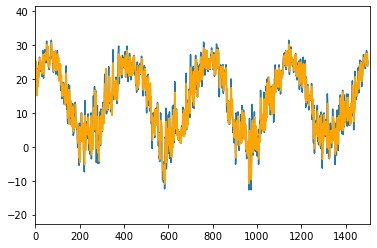

In [39]:
# plot
plt.plot(actuals_test)
plt.plot(predictions_test, color='orange')
plt.xlim(0, len(actuals_test) + 10)
plt.ylim(min(min(actuals_test), min(predictions_test)) - 10, 
         max(max(actuals_test), max(predictions_test)) + 10
        )
plt.plot()
plt.show()

In [40]:
len(actuals_test)

1500

In [41]:
len(predictions_test)

1500

## 2.2.3 Dataframes

### 2.2.3.1 Training

In [42]:
ARIMA_Training_df = pd.DataFrame({'Date' : Days_df['Date'][:len(actuals_train)],
                                  'Actuals' : actuals_train, 
                                  'Forecast' : predictions_train
                             })

In [43]:
# Export to CSV
ARIMA_Training_df.to_csv("./ARIMA_Training_df.csv",
                   index=False, 
                   header=True
                  )

### 2.2.3.2 Test

In [44]:
ARIMA_Test_df = pd.DataFrame({'Date' : Days_df['Date'][len(actuals_train) : len(Days_df)],
                              'Actuals' : actuals_test, 
                              'Forecast' : predictions_test
                             })

In [45]:
# Export to CSV
ARIMA_Test_df.to_csv("./ARIMA_Test_df.csv",
                   index=False, 
                   header=True
                  )

## 2.3. Neural Network model

### 2.3.1 Train

In [50]:
x = Days_df['Avg_Temp']
x

0        5.55
1       10.85
2       14.20
3       11.70
4        3.30
        ...  
7492    25.00
7493    26.10
7494    27.80
7495    23.90
7496    25.25
Name: Avg_Temp, Length: 7497, dtype: float64

In [55]:
# Convert Training Data to Right Shape

features_set = []
labels = []
for i in range(60, 5996):
    features_set.append(x[i-60:i])
    labels.append(x[i])

In [56]:
features_set, labels = np.array(features_set), np.array(labels)

In [57]:
features_set

array([[ 5.55, 10.85, 14.2 , ...,  9.15,  8.85,  6.95],
       [10.85, 14.2 , 11.7 , ...,  8.85,  6.95,  6.1 ],
       [14.2 , 11.7 ,  3.3 , ...,  6.95,  6.1 ,  5.25],
       ...,
       [ 8.05, 16.1 , 21.1 , ..., 26.4 , 26.7 , 27.5 ],
       [16.1 , 21.1 , 12.75, ..., 26.7 , 27.5 , 25.85],
       [21.1 , 12.75,  5.55, ..., 27.5 , 25.85, 23.9 ]])

In [58]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\LKNT\anaconda3\envs\PythonAvd\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LKNT\anaconda3\envs\PythonAvd\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LKNT\anaconda3\envs\PythonAvd\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LKNT\anaconda3\envs\PythonAvd

In [60]:
model = Sequential()

In [61]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
model.add(Dropout(0.2))

In [63]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [64]:
model.add(Dense(units = 1))

In [65]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [66]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5936/5936 [==============================] - 17s 3ms/step - loss: 78.9885
Epoch 2/100
5936/5936 [==============================] - 16s 3ms/step - loss: 27.8992
Epoch 3/100
5936/5936 [==============================] - 16s 3ms/step - loss: 17.2411
Epoch 4/100
5936/5936 [==============================] - 17s 3ms/step - loss: 13.8383
Epoch 5/100
5936/5936 [==============================] - 17s 3ms/step - loss: 12.5582
Epoch 6/100
5936/5936 [==============================] - 17s 3ms/step - loss: 12.2778
Epoch 7/100
5936/5936 [==============================] - ETA: 0s - loss: 11.83 - 17s 3ms/step - loss: 11.8262
Epoch 8/100
5936/5936 [==============================] - 17s 3ms/step - loss: 11.6242
Epoch 9/100
5936/5936 [==============================] - 17s 3ms/step - loss: 11.6681
Epoch 10/100
5936/5936 [==============================] - 17s 3ms/step - loss: 11.2385
Epoch 11/100
5936/5936 [==============================] - 17s 3ms/s

In [67]:
test_x = x[(len(x)-60):len(x)]
len(test_x)

60

In [68]:
test_features = []
for i in range(60, 5996):
    test_features.append(x[i-60:i])

In [69]:
test_features = np.array(test_features)
len(test_features)

5936

In [70]:
test_features

array([[ 5.55, 10.85, 14.2 , ...,  9.15,  8.85,  6.95],
       [10.85, 14.2 , 11.7 , ...,  8.85,  6.95,  6.1 ],
       [14.2 , 11.7 ,  3.3 , ...,  6.95,  6.1 ,  5.25],
       ...,
       [ 8.05, 16.1 , 21.1 , ..., 26.4 , 26.7 , 27.5 ],
       [16.1 , 21.1 , 12.75, ..., 26.7 , 27.5 , 25.85],
       [21.1 , 12.75,  5.55, ..., 27.5 , 25.85, 23.9 ]])

In [71]:
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1],1))

In [72]:
# Making Prediction
predictions = model.predict(test_features)

In [74]:
predictions

array([[ 8.548023 ],
       [ 6.3895345],
       [ 8.308935 ],
       ...,
       [25.65971  ],
       [24.22554  ],
       [23.117214 ]], dtype=float32)

In [75]:
Historical_Train_Filter = x[60 :5996]
Historical_Train = []
for i in Historical_Train_Filter:
    Historical_Train.append(i)


In [76]:
len(Historical_Train)

5936

In [77]:
Historical_Train

[6.1,
 5.25,
 4.45,
 5.85,
 9.2,
 8.35,
 11.1,
 11.15,
 15.3,
 11.4,
 5.0,
 5.25,
 4.45,
 7.5,
 11.4,
 14.45,
 4.75,
 -1.15,
 2.75,
 4.7,
 4.199999999999998,
 6.949999999999998,
 10.55,
 14.75,
 13.9,
 13.6,
 10.25,
 11.35,
 9.75,
 10.25,
 8.9,
 11.65,
 15.0,
 15.3,
 13.6,
 6.95,
 13.05,
 14.45,
 15.85,
 4.45,
 7.75,
 4.15,
 7.2,
 6.4,
 8.049999999999999,
 12.75,
 18.05,
 8.6,
 6.4,
 10.85,
 13.6,
 8.05,
 8.35,
 8.05,
 13.9,
 10.8,
 6.65,
 6.949999999999998,
 11.65,
 13.6,
 14.45,
 12.5,
 16.4,
 15.0,
 15.85,
 22.8,
 25.85,
 25.0,
 26.95,
 28.05,
 18.1,
 17.2,
 17.25,
 17.5,
 18.05,
 15.0,
 15.85,
 18.05,
 21.1,
 12.75,
 9.2,
 11.7,
 12.5,
 14.15,
 19.75,
 19.45,
 19.7,
 16.65,
 16.65,
 15.0,
 13.6,
 15.3,
 22.2,
 26.4,
 19.700000000000006,
 19.15,
 17.8,
 12.8,
 16.1,
 20.85,
 25.0,
 28.05,
 27.5,
 17.5,
 14.2,
 13.9,
 18.9,
 24.7,
 26.65,
 19.75,
 20.0,
 22.5,
 23.35,
 24.75,
 24.15,
 23.85,
 26.1,
 27.200000000000006,
 25.85,
 23.05,
 21.1,
 21.700000000000006,
 23.05,
 25.0,
 25.0,

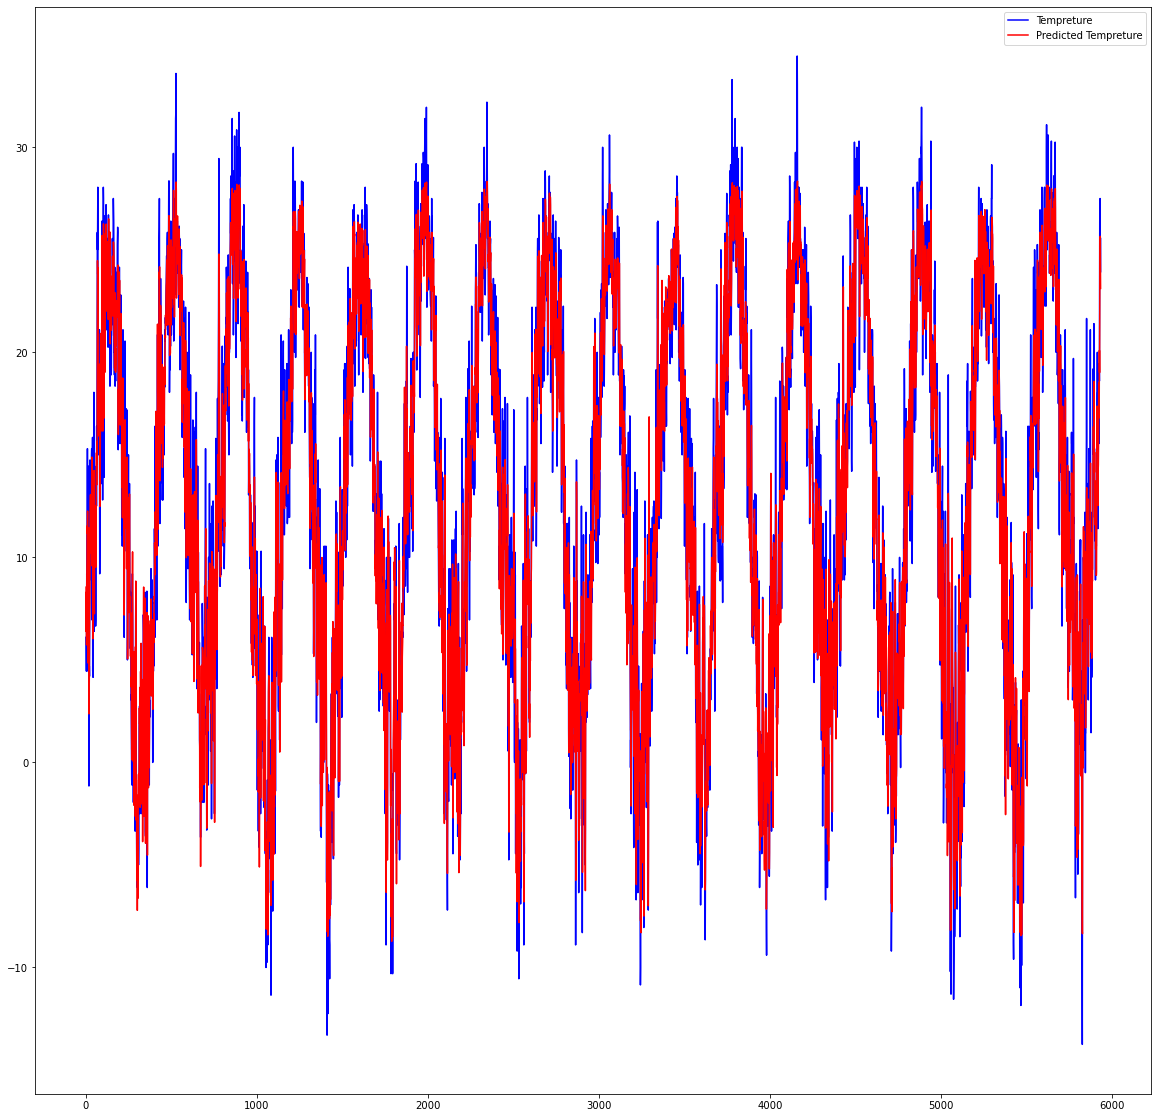

In [78]:
plt.figure(figsize=(20,20))
plt.plot(Historical_Train, color='blue', label='Tempreture')
plt.plot(predictions,color='red', label='Predicted Tempreture')
plt.title ='Weather Prediction'
plt.xlabel= 'Date'
plt.ylabel= 'Tempreture'
plt.legend()
plt.show()

In [79]:
len(predictions)

5936

In [80]:
len(features_set)

5936

In [81]:
predictions

array([[ 8.548023 ],
       [ 6.3895345],
       [ 8.308935 ],
       ...,
       [25.65971  ],
       [24.22554  ],
       [23.117214 ]], dtype=float32)

In [82]:
actuals = x[60:].to_numpy()
actuals

array([ 6.1 ,  5.25,  4.45, ..., 27.8 , 23.9 , 25.25])

In [83]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Historical_Train, predictions)
RMSE = math.sqrt(MSE)

In [84]:
forecast_errors = [Historical_Train[i] - predictions[i] for i in range(len(Historical_Train))]
forecast_errors_abs = [ abs( Historical_Train[i] - predictions[i]) for i in range(len(Historical_Train))]

BIAS = sum(forecast_errors) * 1.0/len(Historical_Train)
MAE = sum(forecast_errors_abs) * 1.0/len(Historical_Train)


from sklearn.metrics import r2_score
r2_score = r2_score(Historical_Train, predictions)

In [85]:
print('Train MSE                         : %f' % MSE)
print('Train RMSE                        : %f' % RMSE)
print('Train Bias (Mean Forecast Error)  : %f' % BIAS)
print('Train MAE (Mean Absolute Error)   : %f' % MAE)
print('Train r2_score                    : %f' % r2_score)

Train MSE                         : 6.120895
Train RMSE                        : 2.474044
Train Bias (Mean Forecast Error)  : 0.064250
Train MAE (Mean Absolute Error)   : 1.940757
Train r2_score                    : 0.932069


In [86]:
Date_train = Days_df["Date"][60: 5996]

In [87]:
len(Date_train)

5936

In [88]:
Prediction_Train = []
for i in predictions:
    Prediction_Train.append(i[0])

In [89]:
len(Prediction_Train)

5936

In [130]:
NEURAL_N_TRAIN_df = pd.DataFrame({"Date" : Date_train,
                                 "Actuals" : Historical_Train,
                                 "Forecast" : Prediction_Train
})

In [131]:
NEURAL_N_TRAIN_df

,Date,Actuals,Forecast
60,2000-03-01,6.10,8.548023
61,2000-03-02,5.25,6.389534
62,2000-03-03,4.45,8.308935
63,2000-03-04,5.85,5.731486
64,2000-03-05,9.20,8.741116
...,...,...,...
5991,2016-05-27,26.70,24.689476
5992,2016-05-28,27.50,25.311375
5993,2016-05-29,25.85,25.659710
5994,2016-05-30,23.90,24.225540


In [132]:
# Export to CSV
NEURAL_N_TRAIN_df.to_csv("./NEURAL_N_TRAIN_df.csv",
                   index=False, 
                   header=True
                  )

### 2.3.2. Test 

In [93]:
# Convert Test Data to Right Shape

features_set = []
labels = []
#for i in range(60, 7497):
for i in range(6057, 7497):
    features_set.append(x[i-60:i])
    labels.append(x[i])

In [94]:
features_set, labels = np.array(features_set), np.array(labels)

In [95]:
features_set

array([[21.15, 19.15, 23.6 , ..., 25.  , 25.85, 23.65],
       [19.15, 23.6 , 20.  , ..., 25.85, 23.65, 23.65],
       [23.6 , 20.  , 23.3 , ..., 23.65, 23.65, 23.05],
       ...,
       [10.85, 11.4 , 10.55, ..., 28.35, 25.  , 26.1 ],
       [11.4 , 10.55, 11.4 , ..., 25.  , 26.1 , 27.8 ],
       [10.55, 11.4 , 13.85, ..., 26.1 , 27.8 , 23.9 ]])

In [96]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [97]:
model = Sequential()

In [98]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [99]:
model.add(Dropout(0.2))

In [100]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [101]:
model.add(Dense(units = 1))

In [102]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [103]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
1440/1440 [==============================] - 5s 4ms/step - loss: 150.8534
Epoch 2/100
1440/1440 [==============================] - 4s 3ms/step - loss: 93.0408
Epoch 3/100
1440/1440 [==============================] - 4s 3ms/step - loss: 59.7653
Epoch 4/100
1440/1440 [==============================] - 4s 3ms/step - loss: 44.7477
Epoch 5/100
1440/1440 [==============================] - 4s 3ms/step - loss: 34.1798
Epoch 6/100
1440/1440 [==============================] - 5s 3ms/step - loss: 29.0250
Epoch 7/100
1440/1440 [==============================] - 5s 3ms/step - loss: 26.7047
Epoch 8/100
1440/1440 [==============================] - 4s 3ms/step - loss: 23.8171
Epoch 9/100
1440/1440 [==============================] - 4s 3ms/step - loss: 21.5685
Epoch 10/100
1440/1440 [==============================] - 4s 3ms/step - loss: 20.7039
Epoch 11/100
1440/1440 [==============================] - 4s 3ms/step - loss: 19.6694
Epoch 12/100
1440/1440 [==============================] - 4s 3

In [104]:
test_x = x[(len(x)-60):len(x)]
len(test_x)

60

In [105]:
test_features = []
for i in range(6057, 7497):
    test_features.append(x[i-60:i])

In [106]:
test_features = np.array(test_features)
len(test_features)

1440

In [107]:
test_features

array([[21.15, 19.15, 23.6 , ..., 25.  , 25.85, 23.65],
       [19.15, 23.6 , 20.  , ..., 25.85, 23.65, 23.65],
       [23.6 , 20.  , 23.3 , ..., 23.65, 23.65, 23.05],
       ...,
       [10.85, 11.4 , 10.55, ..., 28.35, 25.  , 26.1 ],
       [11.4 , 10.55, 11.4 , ..., 25.  , 26.1 , 27.8 ],
       [10.55, 11.4 , 13.85, ..., 26.1 , 27.8 , 23.9 ]])

In [108]:
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1],1))

In [109]:
# Making Prediction
predictions = model.predict(test_features)

In [110]:
predictions

array([[23.317078],
       [24.372211],
       [23.661007],
       ...,
       [25.693718],
       [26.248795],
       [24.27659 ]], dtype=float32)

In [111]:
Historical_Test_Filter = x[6057 : 7497]
Historical_Test = []
for i in Historical_Test_Filter:
    Historical_Test.append(i)

In [112]:
len(Historical_Test)

1440

In [113]:
Historical_Test

[23.65,
 23.05,
 22.8,
 23.3,
 24.450000000000006,
 26.4,
 25.55,
 25.85,
 26.15,
 26.95,
 28.05,
 28.35,
 31.4,
 30.0,
 29.15,
 28.1,
 27.2,
 25.8,
 27.200000000000006,
 24.700000000000006,
 26.4,
 22.200000000000006,
 21.950000000000006,
 25.55,
 25.3,
 28.05,
 27.25,
 26.95,
 28.05,
 25.3,
 27.5,
 23.35,
 23.05,
 21.4,
 22.5,
 23.6,
 24.2,
 25.55,
 26.7,
 28.35,
 27.75,
 23.85,
 21.15,
 23.05,
 26.1,
 19.700000000000006,
 19.450000000000006,
 20.0,
 24.450000000000006,
 22.5,
 23.9,
 24.45,
 24.15,
 24.200000000000006,
 18.05,
 16.65,
 17.75,
 20.55,
 16.950000000000006,
 15.85,
 14.15,
 15.0,
 15.55,
 18.9,
 18.1,
 15.55,
 17.8,
 18.9,
 17.2,
 14.45,
 13.05,
 12.5,
 15.3,
 15.55,
 12.5,
 12.75,
 16.15,
 22.2,
 23.3,
 23.85,
 18.9,
 17.25,
 11.1,
 11.65,
 12.5,
 8.6,
 6.949999999999998,
 8.600000000000001,
 8.1,
 10.85,
 18.3,
 9.45,
 9.4,
 16.65,
 18.05,
 12.2,
 11.7,
 11.1,
 8.35,
 11.95,
 12.2,
 8.850000000000003,
 11.1,
 6.4,
 10.55,
 12.25,
 10.8,
 11.65,
 12.75,
 12.25,
 10.0,

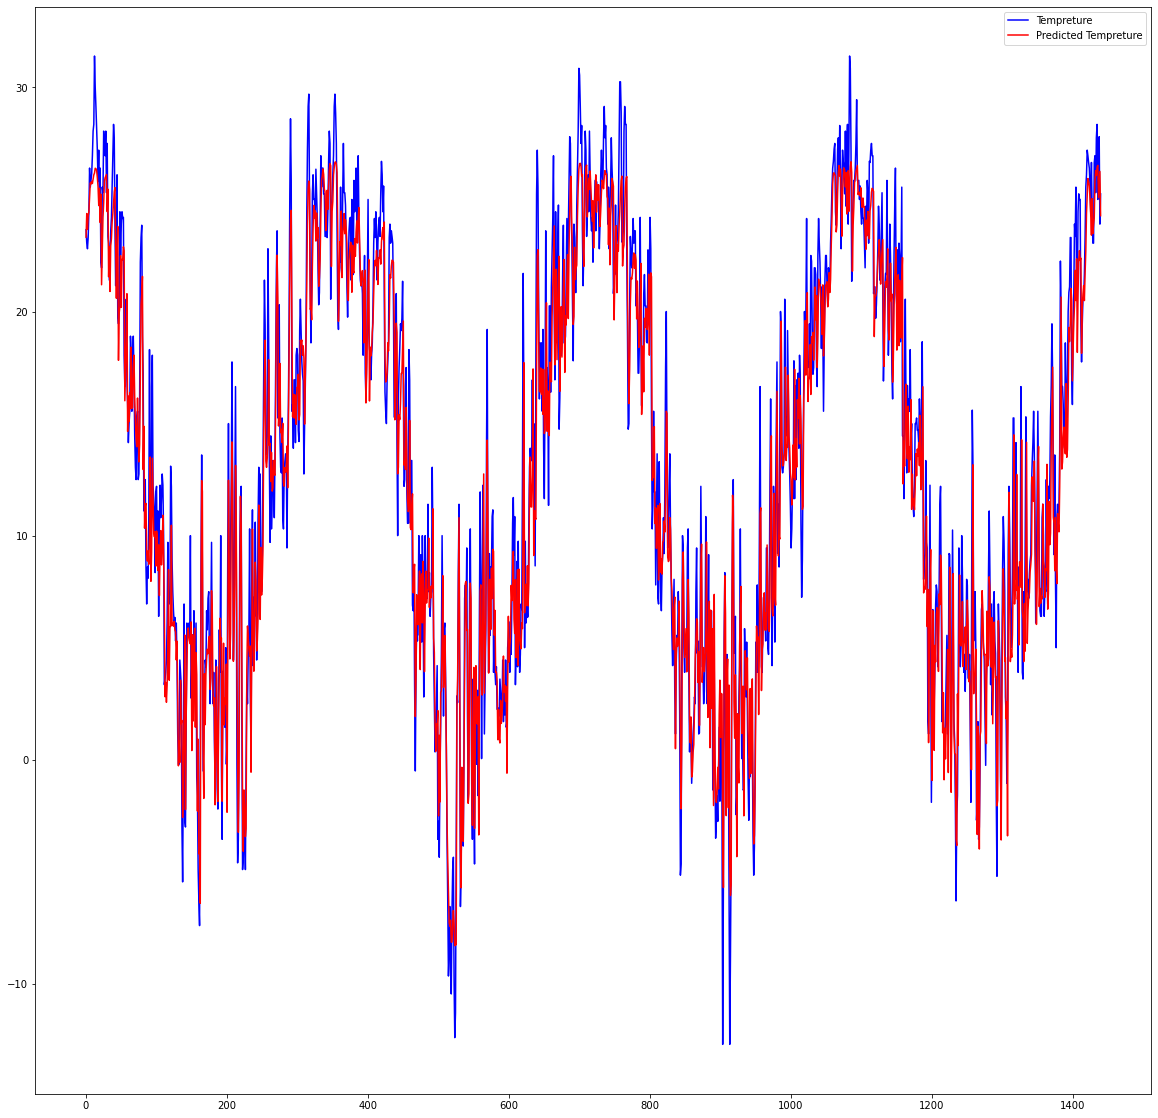

In [114]:
plt.figure(figsize=(20,20))
plt.plot(Historical_Test, color='blue', label='Tempreture')
plt.plot(predictions,color='red', label='Predicted Tempreture')
plt.title ='Weather Prediction'
plt.xlabel= 'Date'
plt.ylabel= 'Tempreture'
plt.legend()
#ax.xaxis_date()
plt.show()

In [115]:
len(predictions)

1440

In [116]:
len(features_set)

1440

In [117]:
actuals = x[60:].to_numpy()
actuals

array([ 6.1 ,  5.25,  4.45, ..., 27.8 , 23.9 , 25.25])

In [118]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Historical_Test,predictions)
RMSE = math.sqrt(MSE)

In [119]:
forecast_errors = [Historical_Test[i] - predictions[i] for i in range(len(Historical_Test))]
forecast_errors_abs = [ abs( Historical_Test[i] - predictions[i]) for i in range(len(Historical_Test))]

BIAS = sum(forecast_errors) * 1.0/len(Historical_Test)
MAE = sum(forecast_errors_abs) * 1.0/len(Historical_Test)


from sklearn.metrics import r2_score
r2_score = r2_score(Historical_Test, predictions)

In [120]:
print('Train MSE                         : %f' % MSE)
print('Train RMSE                        : %f' % RMSE)
print('Train Bias (Mean Forecast Error)  : %f' % BIAS)
print('Train MAE (Mean Absolute Error)   : %f' % MAE)
print('Train r2_score                    : %f' % r2_score )

Train MSE                         : 6.833627
Train RMSE                        : 2.614121
Train Bias (Mean Forecast Error)  : 0.548839
Train MAE (Mean Absolute Error)   : 2.073415
Train r2_score                    : 0.922305


In [121]:
Date_test = Days_df["Date"][6057 : 7497]

In [122]:
len(Date_test)

1440

In [123]:
Prediction_Test = []
for i in predictions:
    Prediction_Test.append(i[0])

In [124]:
Prediction_Test

[23.317078,
 24.372211,
 23.661007,
 24.265926,
 24.44093,
 25.13666,
 25.738949,
 25.681826,
 25.809555,
 25.712627,
 25.898003,
 26.095913,
 26.178116,
 26.392859,
 26.374693,
 26.295675,
 25.973486,
 25.571686,
 24.739899,
 25.498552,
 23.972658,
 25.238342,
 21.194212,
 22.6967,
 24.203886,
 24.842709,
 25.813835,
 25.965473,
 26.041382,
 26.113161,
 24.456072,
 25.458912,
 21.549082,
 22.902079,
 20.894617,
 22.947975,
 23.244616,
 23.995615,
 24.365746,
 24.81772,
 25.330976,
 25.530394,
 23.139668,
 20.593037,
 22.65434,
 23.796698,
 17.821209,
 19.933653,
 20.225676,
 22.490545,
 20.186806,
 22.326647,
 22.312881,
 22.887156,
 22.713306,
 16.018345,
 17.28626,
 18.645716,
 20.79365,
 14.650081,
 16.227322,
 15.088153,
 16.378956,
 15.663503,
 18.40786,
 15.67959,
 15.719487,
 17.54027,
 18.053389,
 16.159893,
 15.062941,
 14.327809,
 13.965782,
 16.138485,
 14.452615,
 13.289666,
 14.062902,
 17.34891,
 20.303337,
 20.767162,
 21.56672,
 12.951177,
 14.879732,
 10.334174,
 11.3

In [125]:
len(Prediction_Test)

1440

In [133]:
NEURAL_N_TEST_df = pd.DataFrame({"Date" : Date_test,
                                 "Actuals" : Historical_Test,
                                 "Forecast" : Prediction_Test
    
})

In [134]:
NEURAL_N_TEST_df

,Date,Actuals,Forecast
6057,2016-08-01,23.65,23.317078
6058,2016-08-02,23.05,24.372211
6059,2016-08-03,22.80,23.661007
6060,2016-08-04,23.30,24.265926
6061,2016-08-05,24.45,24.440929
...,...,...,...
7492,2020-07-07,25.00,26.520422
7493,2020-07-08,26.10,25.079432
7494,2020-07-09,27.80,25.693718
7495,2020-07-10,23.90,26.248795


In [135]:
# Export to CSV
NEURAL_N_TEST_df.to_csv("./NEURAL_N_TEST_df.csv",
                   index=False, 
                   header=True
                  )